## Figure of bathymetry and CS definitions

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.gridspec as gspec
import matplotlib as mpl
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plotCSPos(ax,CS1,CS2,CS3,CS4,CS5,LID):
    ax.axvline(x=CS1, ymin=1., ymax=0.75, color='0.95',linestyle='-')
    ax.axvline(x=CS2, ymin=1., ymax=0.75,color='0.95',linestyle='-')
    ax.axvline(x=CS3, ymin=1., ymax=0.75,color='0.95',linestyle='-')
    ax.axvline(x=CS4, ymin=1., ymax=0.75,color='0.95',linestyle='-')
    ax.axvline(x=CS5, ymin=1., ymax=0.75,color='0.95',linestyle='-')
    ax.axhline(y=LID, xmin=0., xmax=1,color='0.95',linestyle='-')
    
def plotPoolArea(ax,xx,yy):
    #ax.plot(xx[1,:],yy[1,:],'--k')
    ax.plot(xx[:,1],yy[:,1],':k')
    ax.plot(xx[-1,:],yy[-1,:],':k')
    ax.plot(xx[:,-1],yy[:,-1],':k')
  
def plotCSLines(ax,xx,yy,CS1x,CS2x,CS3x,CS4x):
    ax.plot(xx[227,slice(0,CS1x)],yy[227,slice(0,CS1x)],'-',color='0.5',linewidth=3)
    ax.plot(xx[227,slice(CS1x,CS2x)],yy[227,slice(CS1x,CS2x)],'-k',linewidth=3)
    ax.plot(xx[227,slice(CS2x,CS3x)],yy[227,slice(CS2x,CS3x)],'-',color='0.5',linewidth=3)
    ax.plot(xx[227,slice(CS3x,CS4x)],yy[227,slice(CS3x,CS4x)],'-k',linewidth=3)
    ax.plot(xx[227,slice(CS4x,360)],yy[227,slice(CS4x,360)],'-',color='0.5',linewidth=3)
    

In [3]:
# Cross-shelf 
def Plot1_crossshelf(gs_ax,depths,zslice,yslice,xind_shelf=100,xind_axis=180,color='black'): 
    
    ax = plt.subplot(gs_ax)
    
    ax.plot(grid.Y[yslice]/1000,depths[yslice,xind_shelf],
            '--',
            color=color,
            linewidth=2,
                )
    ax.plot(grid.Y[yslice]/1000,depths[yslice,xind_axis],
            '-',
            color=color,
            linewidth=2,
            )
    ax.contourf(grid.Y[yslice]/1000,grid.RC[zslice],grid.HFacC[zslice,yslice,xind_axis],[0,0.5,1],colors=['0.7','1','1'])
    #ax.axvline(x=grid.Y[227]/1000, linestyle=':',color='k')
    #ax.axhline(y=grid.Z[29], linestyle=':',color='k')
   
    return ax

In [4]:
# Alongshelf
def Plot2_alongshelf(gs_ax,depths,zslice,xslice,yind=227,color='black'): 
    
    ax = plt.subplot(gs_ax)
    
    plotCSPos(ax,grid.XC[1,60]/1000,grid.XC[1,120]/1000,grid.XC[1,240]/1000,grid.XC[1,300]/1000,
              grid.XC[1,360]/1000,grid.Z[29])
    ax.plot(grid.X[xslice]/1000,depths[yind,xslice],
            '-',
            color=color,
            linewidth=2,
                )
    ax.plot(grid.X[xslice]/1000,depths[yind,xslice],
            '--',
            color=color,
            linewidth=2,
            )
    ax.contourf(grid.X[xslice]/1000,grid.RC[zslice],grid.HFacC[zslice,yind,xslice],[0,0.5,1],colors=['0.7','1','1'])
    #ax.axhline(y=grid.Z[29], linestyle=':',color='k')
    
    return ax

In [5]:
# Top view
def Plot3_topview(gs_ax,depths,xslice,yslice,color='black'): 
    
    ax = plt.subplot(gs_ax)
    
    plotPoolArea(ax,grid.XC[slice(227,300),slice(120,360)]/1000,grid.YC[slice(227,300),slice(120,360)]/1000)
    ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,depths[yslice,xslice],[147.5],
               colors=['k'])
    CS=ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,depths[yslice,xslice],[20,100,200,400,600,800,1000,1200],
               colors=['0.8','0.8','0.8','0.8','0.8','0.8','0.8','0.8'])
    #plt.clabel(CS, fontsize=9,inline=1,inline_spacing=1,manual=[[250,70],[20,60],[250,45]],
    #           fmt = '%1.0f', ticks=[20,100,200])
    plt.clabel(CS, fontsize=9,inline=1,inline_spacing=1,
               fmt = '%1.0f', ticks=[400,600,800,1000])

    #plotCSLines(ax,grid.XC/1000,grid.YC/1000,60,120,240,300)
    return ax

# Top view
def Plot4_zoom(gs_ax,depths,xslice,yslice,color='black'): 
    
    ax = plt.subplot(gs_ax)
    
    ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,depths[yslice,xslice],[100,110,120,140,147.5],
               colors=['0.8','0.8','0.8','0.8','k'])
    
    return ax

In [6]:
# Grid, state and tracers datasets of base case
grid_file = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid = xr.open_dataset(grid_file)


In [7]:
# General input
nx = 616
ny = 360
nz = 90
nt = 19 # t dimension size 

xslice=slice(100,360)
yslice=slice(120,310)

tslice = slice(8,16)

xind = 240
yind = 227 # y index for alongshore cross-section
zind = 27

hFacmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacmasked)

print(grid.X[615]/1000)

<xarray.DataArray 'X' ()>
array(280.965)
Coordinates:
    X        float64 2.81e+05


In [8]:
zslice = slice(0,90)
yslice = slice(0,360)
xslice = slice(0,616)

xslice2 = slice(0,616)
zslice2 = slice(0,57)

xslice4 = slice(95,265)
yslice4 = slice(225,270)



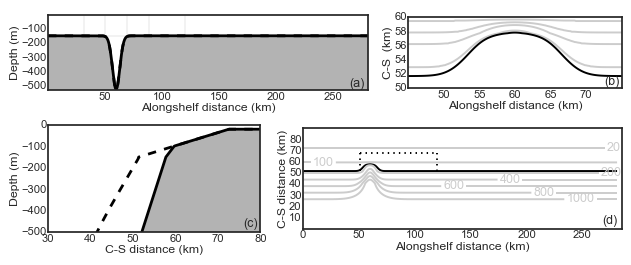

In [157]:
sns.set_style('white')
sns.set_context('paper')
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.4,4.6)) 

gs = gspec.GridSpec(2, 1, height_ratios=[0.7,1], hspace=-0.3)
gs0 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0,0],height_ratios=[1,1.3],width_ratios=[0.6,0.4], wspace=0.15)
gs1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1,0],height_ratios=[1,1.3],width_ratios=[0.4,0.6], wspace=0.16)

ax2 = Plot1_crossshelf(gs1[0,0],-grid.Depth,zslice,yslice,xind_shelf=100,xind_axis=180,color='black')
ax2.set_ylim(-500,0)
ax2.set_xlim(30,80)

ax4 = Plot2_alongshelf(gs0[0,0],-grid.Depth,zslice2,xslice2)
ax3 = Plot3_topview(gs1[0,1],grid.Depth,xslice,yslice)
ax1 = Plot4_zoom(gs0[0,1],grid.Depth,xslice4,yslice4)
ax1.set_ylim(50,60)
ax1.set_xlim(45,75)

ax1.set_xticks([45,50,55,60,65,70,75])
ax1.set_xticklabels(['','50','55','60','65','70',''])

ax1.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)
ax3.tick_params(axis='x', pad=1)
ax4.tick_params(axis='x', pad=1)

ax1.tick_params(axis='y', pad=1)
ax2.tick_params(axis='y', pad=1)
ax3.tick_params(axis='y', pad=1)
ax4.tick_params(axis='y', pad=1)

ax4.set_xlabel('Alongshelf distance (km)',labelpad=1)
ax2.set_xlabel('C-S distance (km)',labelpad=1)
ax2.set_ylabel('Depth (m)',labelpad=1)
ax4.set_ylabel('Depth (m)',labelpad=1)

ax1.set_xlabel('Alongshelf distance (km)',labelpad=1)
ax3.set_xlabel('Alongshelf distance (km)',labelpad=1)

ax1.set_ylabel('C-S  (km)',labelpad=1)
ax3.set_ylabel('C-S distance (km)',labelpad=1)

ax1.text(0.92,0.05,'(b)',fontsize=9,transform=ax1.transAxes)
ax2.text(0.92,0.05,'(c)',transform=ax2.transAxes,fontsize=9,)
ax3.text(0.94,0.05,'(d)',transform=ax3.transAxes,fontsize=9,)
ax4.text(0.94,0.05,'(a)',transform=ax4.transAxes,fontsize=9,)
ax3.set_xlim(0,285)
ax3.set_aspect(1)
ax1.set_aspect('equal')
plt.savefig('fig_bathy.eps',format='eps',bbox_inches='tight')


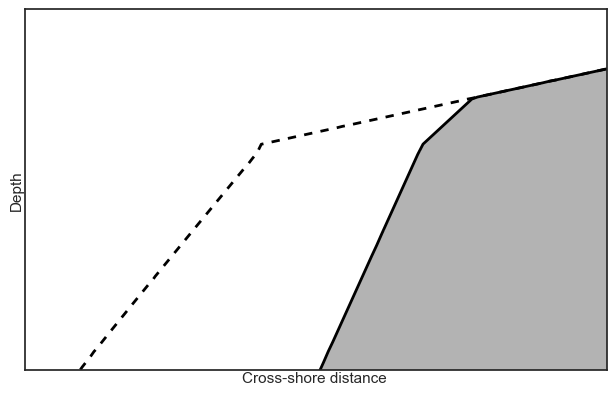

In [15]:
sns.set_style('white')
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.5,4.65)) 

gs = gspec.GridSpec(1, 1)

ax1 = Plot1_crossshelf(gs[0],-grid.Depth,zslice,yslice,xind_shelf=100,xind_axis=180,color='black')
ax1.set_xticks([])
ax1.set_ylim(-400,0)
ax1.set_xlim(42,65)


ax1.tick_params(axis='x')
ax1.tick_params(axis='y')


ax1.set_xlabel('Cross-shore distance ',labelpad=1)
ax1.set_ylabel('Depth',labelpad=1)


Shelf-break depth is -147.5 m, and head depth is -97.5 m


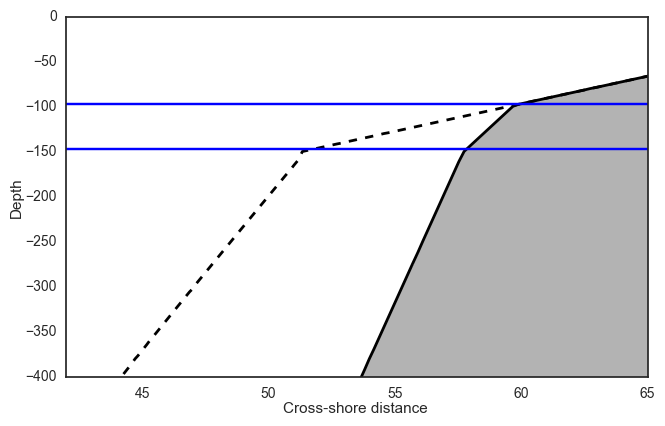

In [30]:
sns.set_style('white')
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (7.5,4.65)) 

gs = gspec.GridSpec(1, 1)

ax1 = Plot1_crossshelf(gs[0],-grid.Depth,zslice,yslice,xind_shelf=100,xind_axis=180,color='black')
ax1.set_yticks([0,-50,-100,-150,-200,-250,-300,-350,-400])
ax1.set_ylim(-400,0)
ax1.set_xlim(42,65)

ax1.axhline(grid.RC[29])
ax1.axhline(grid.RC[19])
print('Shelf-break depth is %1.1f m, and head depth is %1.1f m' %(grid.RC[29],grid.RC[19]))
ax1.set_xlabel('Cross-shore distance ',labelpad=1)
ax1.set_ylabel('Depth',labelpad=1)


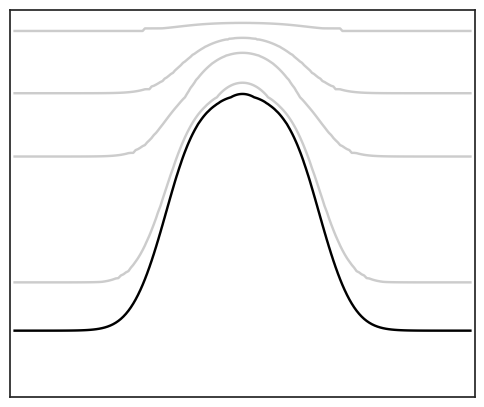

In [16]:
sns.set_style('white')
plt.rcParams['font.size'] = 8.0

fig,ax = plt.subplots(1,1,figsize=(6,5))

ax4 = Plot4_zoom(ax,grid.Depth,xslice4,yslice4)
ax4.set_ylim(50,60)
ax4.set_xlim(40,80)

ax4.set_xticks([])
ax4.set_yticks([])
plt.savefig('fig_topview_bathyzoom.eps',format='eps',bbox_inches='tight')

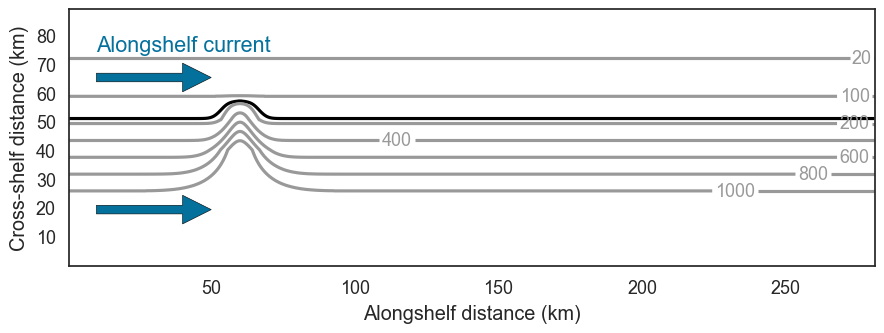

In [43]:
# Plot for OSM 2018
sns.set_context('talk')
sns.set_style('white')

    
fig, ax = plt.subplots(1,1)
    
ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,grid.Depth[yslice,xslice],[147.5],
           colors=['k'])
CS=ax.contour(grid.X[xslice]/1000,grid.Y[yslice]/1000,grid.Depth[yslice,xslice],[20,100,200,400,600,800,1000,1200],
              colors=['0.6','0.6','0.6','0.6','0.6','0.6','0.6','0.6'])
#plt.clabel(CS, fontsize=9,inline=1,inline_spacing=1,manual=[[250,70],[20,60],[250,45]],
#           fmt = '%1.0f', ticks=[20,100,200])
plt.clabel(CS, fontsize=13,inline=1,inline_spacing=1,
           fmt = '%1.0f', ticks=[400,600,800,1000])


ax.arrow(10, 66, 30, 0 , width = 3, head_width=10, head_length=10, fc=sns.xkcd_rgb['ocean blue'], ec='k')
ax.arrow(10, 20, 30, 0 , width = 3, head_width=10, head_length=10, fc=sns.xkcd_rgb['ocean blue'], ec='k')
ax.text(10,75,'Alongshelf current',color=sns.xkcd_rgb['ocean blue'] )
ax.set_aspect(1)
ax.set_ylabel('Cross-shelf distance (km)')    
ax.set_xlabel('Alongshelf distance (km)')    

plt.savefig('bathy_OSM2018.eps',format='eps',bbox_inches='tight')
